In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-study-hours/score.csv


In [2]:
df = pd.read_csv("../input/student-study-hours/score.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


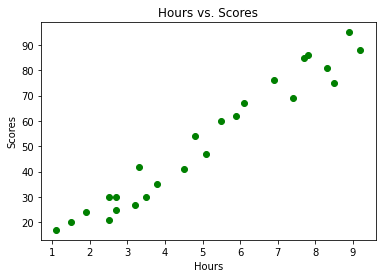

In [6]:
plt.scatter(x=df["Hours"], y=df["Scores"], color="green")

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.title("Hours vs. Scores")
plt.show()

In [7]:
X = df["Hours"]
y = df["Scores"]


In [8]:
print(X)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


In [9]:
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [10]:
import sklearn.model_selection

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8)

In [12]:
print(X_train)

23    6.9
17    1.9
10    7.7
8     8.3
9     2.7
0     2.5
18    6.1
12    4.5
14    1.1
6     9.2
3     8.5
4     3.5
20    2.7
5     1.5
2     3.2
15    8.9
24    7.8
1     5.1
13    3.3
7     5.5
Name: Hours, dtype: float64


In [13]:
print(y_train)

23    76
17    24
10    85
8     81
9     25
0     21
18    67
12    41
14    17
6     88
3     75
4     30
20    30
5     20
2     27
15    95
24    86
1     47
13    42
7     60
Name: Scores, dtype: int64


In [14]:
print(X_test)

16    2.5
11    5.9
22    3.8
19    7.4
21    4.8
Name: Hours, dtype: float64


In [15]:
print(y_test)

16    30
11    62
22    35
19    69
21    54
Name: Scores, dtype: int64


In [16]:
X_test.shape

(5,)

In [17]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [18]:
type(X_train)

numpy.ndarray

In [19]:
X_train.shape

(20,)

In [20]:
X_test = X_test.reshape(5,1)

In [21]:
X_test.shape

(5, 1)

In [22]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)



In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


In [24]:
import sklearn.linear_model

In [25]:
lin_model = sklearn.linear_model.LinearRegression()

In [26]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [27]:
import sklearn.metrics

In [28]:
predictions = lin_model.predict(X_test)


In [29]:
X_test[-1]

array([4.8])

In [30]:
print(predictions)

[[26.68920142]
 [60.30284196]
 [39.54147574]
 [75.13238926]
 [49.42784061]]


In [31]:
for i in range(len(X_test)):
    print(f"{i}: Gercek Deger: {y_test[i]} - Tahmin: {predictions[i]}")

0: Gercek Deger: [30] - Tahmin: [26.68920142]
1: Gercek Deger: [62] - Tahmin: [60.30284196]
2: Gercek Deger: [35] - Tahmin: [39.54147574]
3: Gercek Deger: [69] - Tahmin: [75.13238926]
4: Gercek Deger: [54] - Tahmin: [49.42784061]


In [32]:
r2 = sklearn.metrics.r2_score(y_test, predictions)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)

In [33]:
print(r2)
print(mae)
print(mse)

0.9188677363831826
4.050796203029068
18.595514820974547


In [34]:
score_tahmini = lin_model.predict([[5]])

In [35]:
print(score_tahmini)

[[51.40511358]]


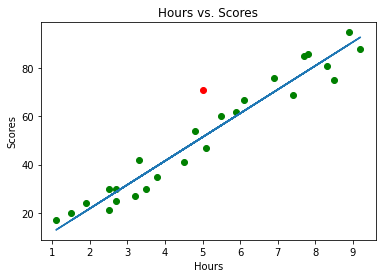

In [36]:
X_predictions = lin_model.predict(X_train)

plt.scatter(x=df["Hours"], y=df["Scores"], color="green")
plt.plot(X_train, X_predictions)
plt.scatter(x=5, y=lin_model.predict([[7]]), color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.title("Hours vs. Scores")
plt.show()